# Heart failure prediction 
## 1. Data Preprocessing and visualisation 
> 1.1. Data loading  <br /> 
> 1.2. Checking for missing values <br /> 
> 1.3. Checking the outliers <br /> 
>> 1.3.1. The skewness of data <br /> 
>> 1.3.2. Outliers counting <br /> 
>
> 1.4. Data visualisations <br /> 
>> 1.4.1. Plotting figures <br />
>> 1.4.2. Correlation between the attributes and the heatmap 
    
## 2. Modeling 
> 2.1. Transforming the data to reduce outliers <br />
> 2.2. One-hot Encoding <br />
> 2.3. Splitting the data  <br />
> 2.4. Testing diffrent models with GridSearchCV and RandomizedSearchCV <br />
> 2.5. Making new models with the best hiperparameters <br />


## 3. Final analysis 
> 3.1. Checking the accuracy of models on K-fold validation <br />
> 3.2. ROC curves and AUC <br />
> 3.3. Confusion matrices and test accuracy 




## 1. Data Preprocessing   

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

### 1.1. Data loading 

In [2]:
data = pd.read_csv("heart.csv", sep=',')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### About the dataset
* **age**: age of the patient

* **sex**: sex of the patient

* **cp**: chest pain type chest pain type

    * Value 1: typical angina
    * Value 2: atypical angina
    * Value 3: non-anginal pain
    * Value 4: asymptomatic
    
* **trtbps**: resting blood pressure (in mm Hg)

* **chol**: cholestoral in mg/dl fetched via BMI sensor

* **fbs**: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

* **restecg**: resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

* **thalach**: maximum heart rate achieved

* **exng**: exercise induced angina (1 = yes; 0 = no)

* **oldpeak**: previous peak

* **slp**: slope 

* **caa**: number of major vessels (0-4)

* **thall**: thal rate
   
* **output**: 0= less chance of heart attack 1= more chance of heart attack

In [3]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### 1.2. Checking for missing values

In [4]:
data.shape

(303, 14)

We have 303 rows and 14 columns.

In [5]:
data.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

All objects are int or float so there is no need to change the data.

In [6]:
data.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

### 1.3. Checking for outliers 

Text(0.5, 0.98, 'Boxplots to visualize outliers')

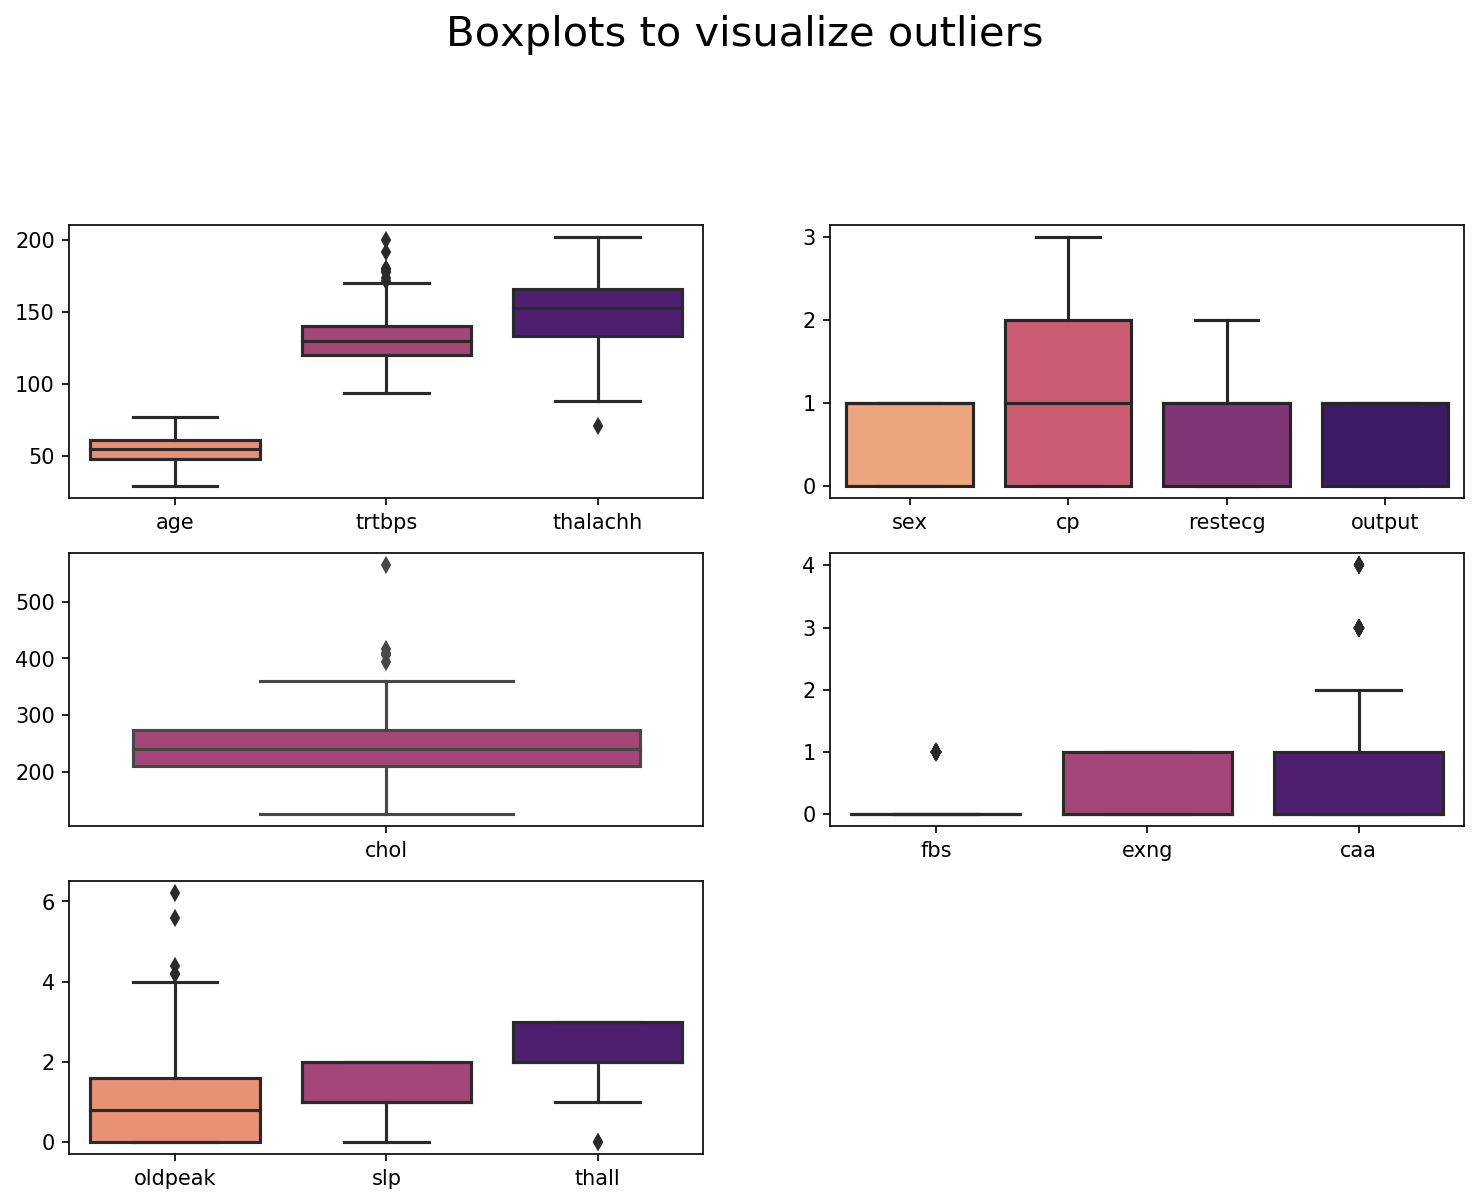

In [7]:
plt.figure(dpi=150, figsize=(12,14))

plt.subplot(5,2,1)
sns.boxplot(data=data[['age', 'trtbps', 'thalachh']], palette="magma_r")

plt.subplot(5,2,2)
sns.boxplot(data=data[['sex', 'cp', 'restecg', 'output']], palette="magma_r")

plt.subplot(5,2,3)
sns.boxplot(data=data[['chol']], palette="magma_r")

plt.subplot(5,2,4)
sns.boxplot(data=data[['fbs', 'exng', 'caa']], palette="magma_r")

plt.subplot(5,2,5)
sns.boxplot(data=data[['oldpeak', 'slp', 'thall']], palette="magma_r")

plt.suptitle("Boxplots to visualize outliers", fontsize=20)

On the first glance we can see that the main outliers are in columns: trtbps, chol, oldpeak, caa

#### 1.3.1. The skewness of data 

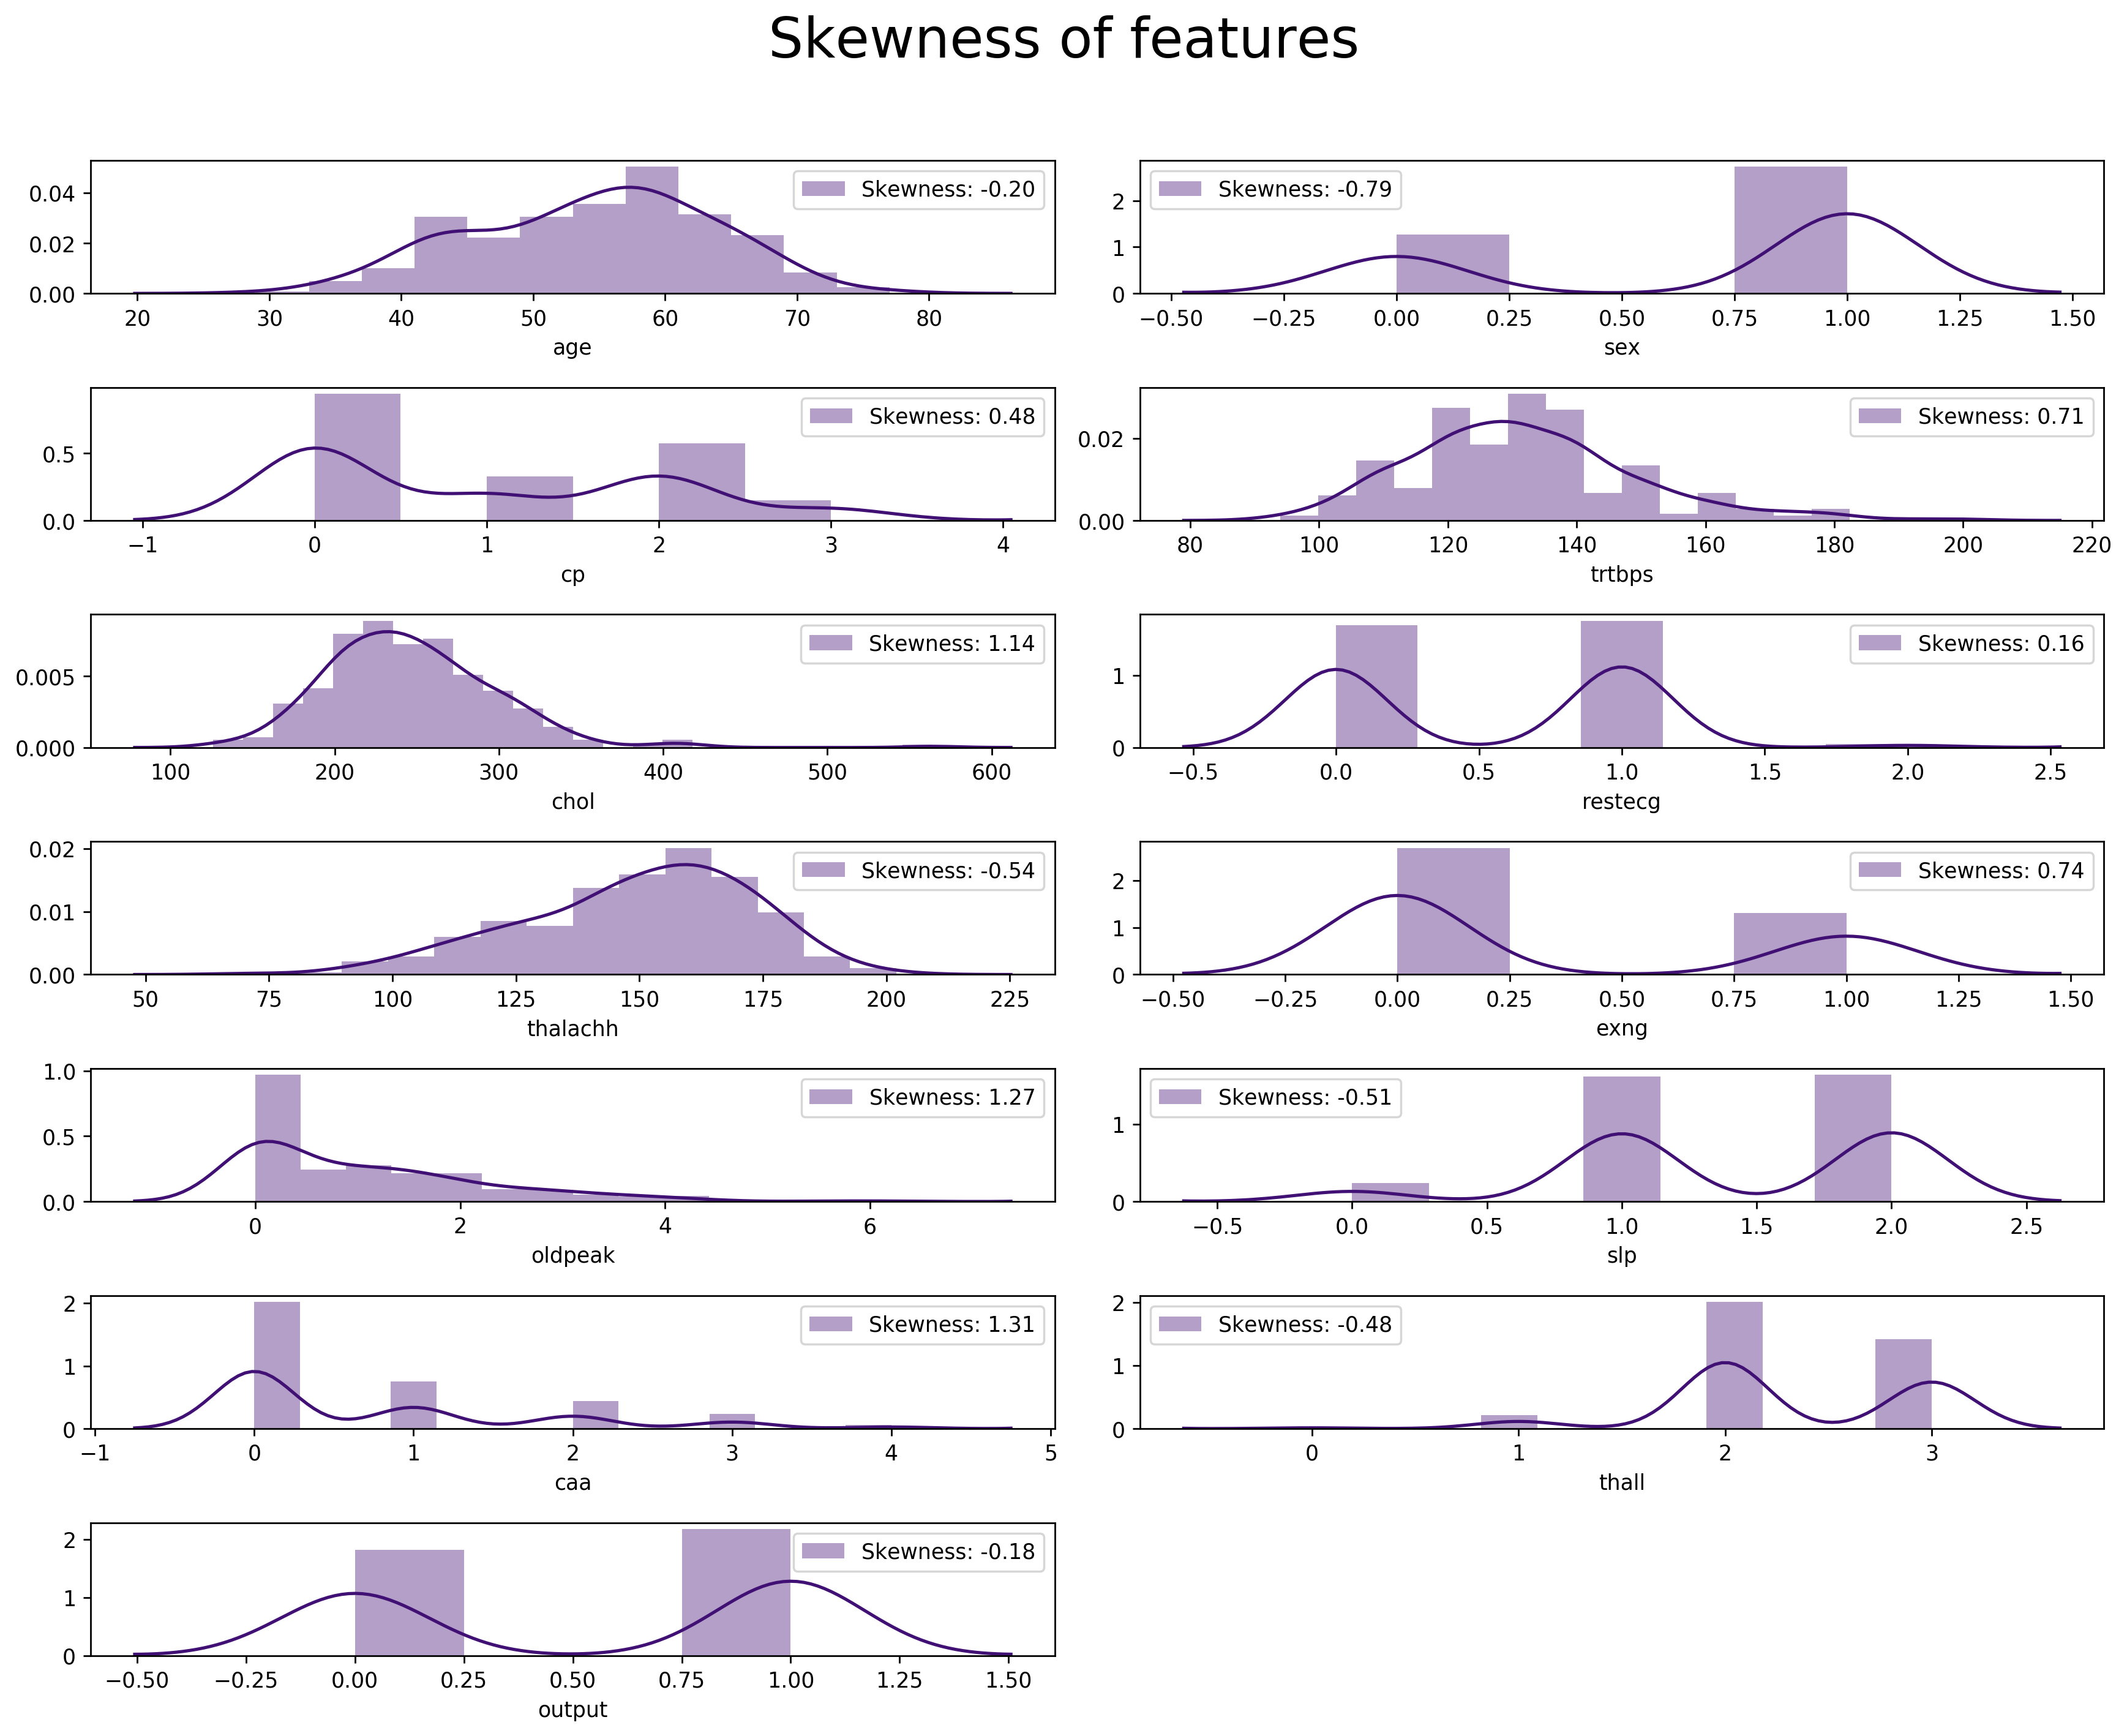

In [8]:
skewness = [data[feature].skew() for feature in data.columns[0:14].drop('fbs')]

plt.figure(figsize=(14,16), dpi=250)
for i, skew, feature in zip(range(0,13), skewness, data.columns[0:14].drop('fbs')):
    plt.subplot(11, 2, i+1)
    sns.distplot(data[feature], color="#411074", label="Skewness: %.2f"%(skew))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.suptitle("Skewness of features", fontsize=26, y=1.05)

#### 1.3.2. Outliers counting 

In [9]:
# Q1 
q1 = data.quantile(0.25)
# Q3
q3 = data.quantile(0.75)
# IQR
IQR = q3 - q1
# Outlier range
upper = q3 + IQR * 1.5
lower = q1 - IQR * 1.5
upper_dict = dict(upper)
lower_dict = dict(lower)

In [10]:
for i, v in data.items():
    v_col = v[( v<= lower_dict[i]) | (v >= upper_dict[i])]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
    print("Column {} outliers = {} => {}%".format(i, len(v_col), round((perc),3)))

Column age outliers = 0 => 0.0%
Column sex outliers = 0 => 0.0%
Column cp outliers = 0 => 0.0%
Column trtbps outliers = 13 => 4.29%
Column chol outliers = 5 => 1.65%
Column fbs outliers = 303 => 100.0%
Column restecg outliers = 0 => 0.0%
Column thalachh outliers = 1 => 0.33%
Column exng outliers = 0 => 0.0%
Column oldpeak outliers = 8 => 2.64%
Column slp outliers = 0 => 0.0%
Column caa outliers = 25 => 8.251%
Column thall outliers = 2 => 0.66%
Column output outliers = 0 => 0.0%


### 1.4. Data visulaization

In [11]:
print('output values:', data['output'].unique())
print('output cp:', data['cp'].unique())
print('output restecg:', data['restecg'].unique())
print('output exng:', data['exng'].unique())
print('output caa:', data['caa'].unique())
print('output slp:', data['slp'].unique())

output values: [1 0]
output cp: [3 2 1 0]
output restecg: [0 1 2]
output exng: [0 1]
output caa: [0 2 1 3 4]
output slp: [0 2 1]


##### 1.4.1. Plotting figures

1    165
0    138
Name: output, dtype: int64

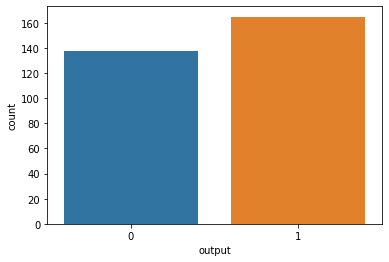

In [12]:
sns.countplot(data['output'], label='count').set(title='')
data['output'].value_counts()

We can see that there is rather close amount of samples for both pepole that had and had not got heart attack.
Where: 
1 - heart attack appeared
0 - heart attack does not appeared

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

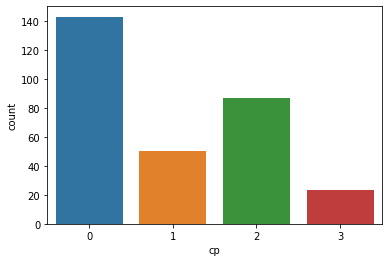

In [13]:
sns.countplot(data['cp'], label='count')
data['cp'].value_counts()

We can observe that there are the most pepole with 0 type chest pain with typical angina and the least with asympthotic type.

1    152
0    147
2      4
Name: restecg, dtype: int64

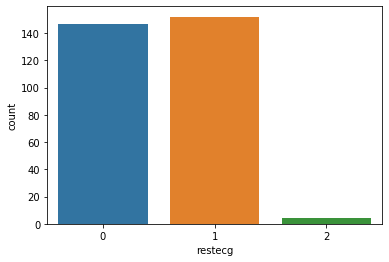

In [14]:
sns.countplot(data['restecg'], label='count')
data['restecg'].value_counts()

1. In the samples there is very low amount of pepole that are showing probable or definite left ventricular hypertrophy by Estes' 
2. There is nearly the same amount of pepole with normal resting electrocardiographic results and pepole with ST-T wave abnormality

0    175
1     65
2     38
3     20
4      5
Name: caa, dtype: int64

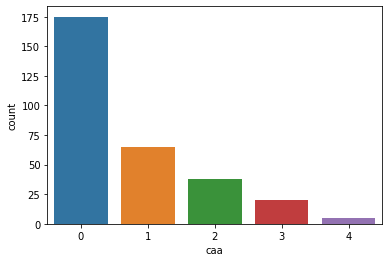

In [15]:
sns.countplot(data['caa'], label='count')
data['caa'].value_counts()

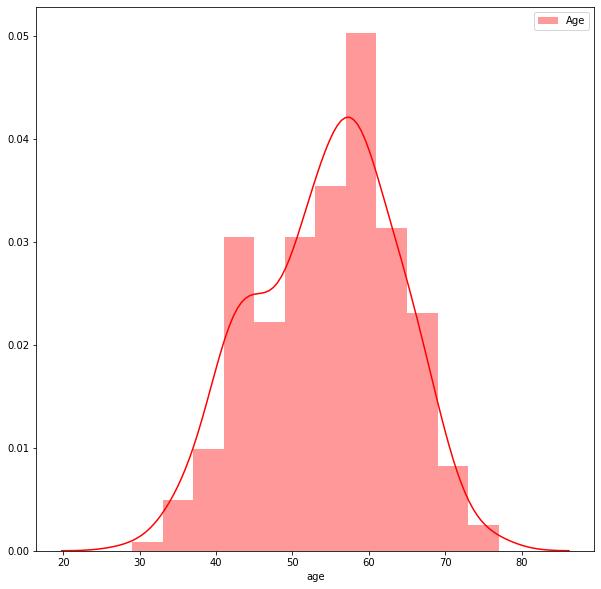

In [16]:
plt.figure(figsize=(10,10))
sns.distplot(data['age'], color="red", label="Age", kde= True)
plt.legend()

Text(0, 0.5, 'Density')

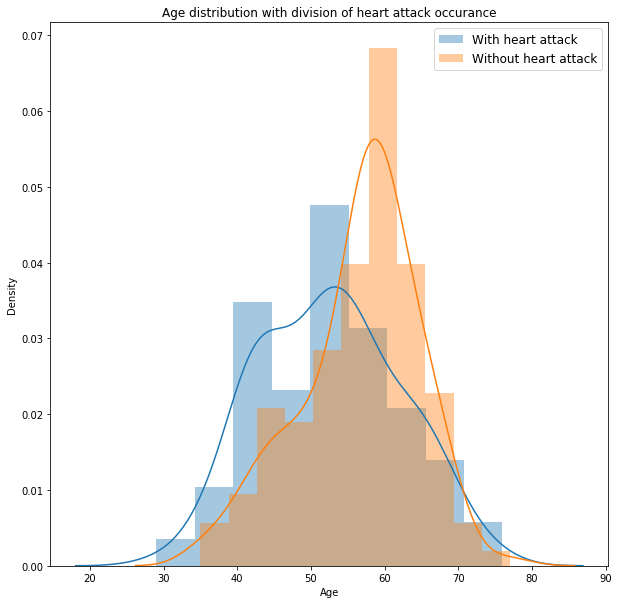

In [17]:
plt.figure(figsize=(10,10))
df = data[data.output == 1]
sns.distplot(df['age'],  kde=True, label='With heart attack')

df = data[data.output == 0]
sns.distplot(df['age'],  kde=True, label='Without heart attack')

# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Age distribution with division of heart attack occurance')
plt.xlabel('Age')
plt.ylabel('Density')

1. Pepole from collected data are from thier 40's till 70's.
2. In the higher age group heart attack does not occurs as often as in the middle aged group.  

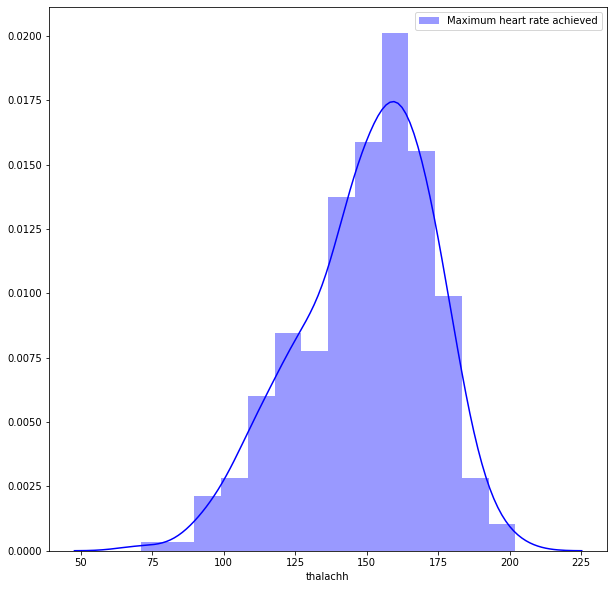

In [18]:
plt.figure(figsize=(10,10))
sns.distplot(data['thalachh'], color="blue", label="Maximum heart rate achieved", kde= True)
plt.legend()

Text(0, 0.5, 'Density')

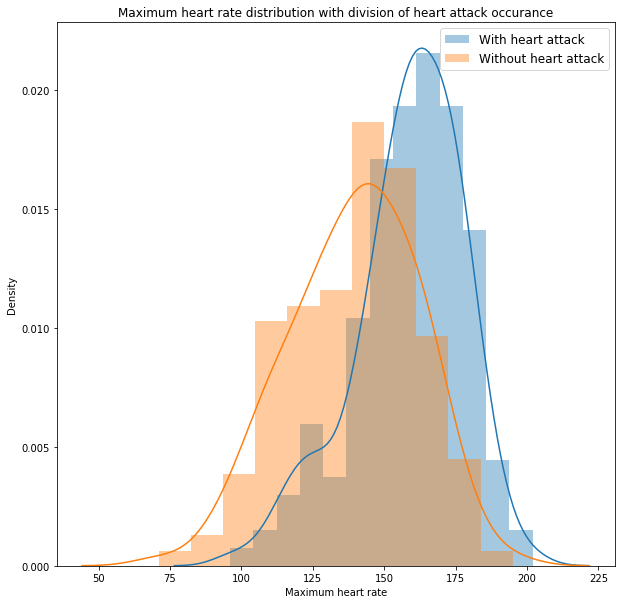

In [19]:
plt.figure(figsize=(10,10))
df = data[data.output == 1]
sns.distplot(df['thalachh'],  kde=True, label='With heart attack')

df = data[data.output == 0]
sns.distplot(df['thalachh'],  kde=True, label='Without heart attack')

# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Maximum heart rate distribution with division of heart attack occurance')
plt.xlabel('Maximum heart rate')
plt.ylabel('Density')

On this graphs we can see that there is correlation between higher maximum heart rate and heart attack 

##### 1.4.2. Correlation between the attributes and the heatmap 

In [20]:
data.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


Correlation between the attributes in dataset.

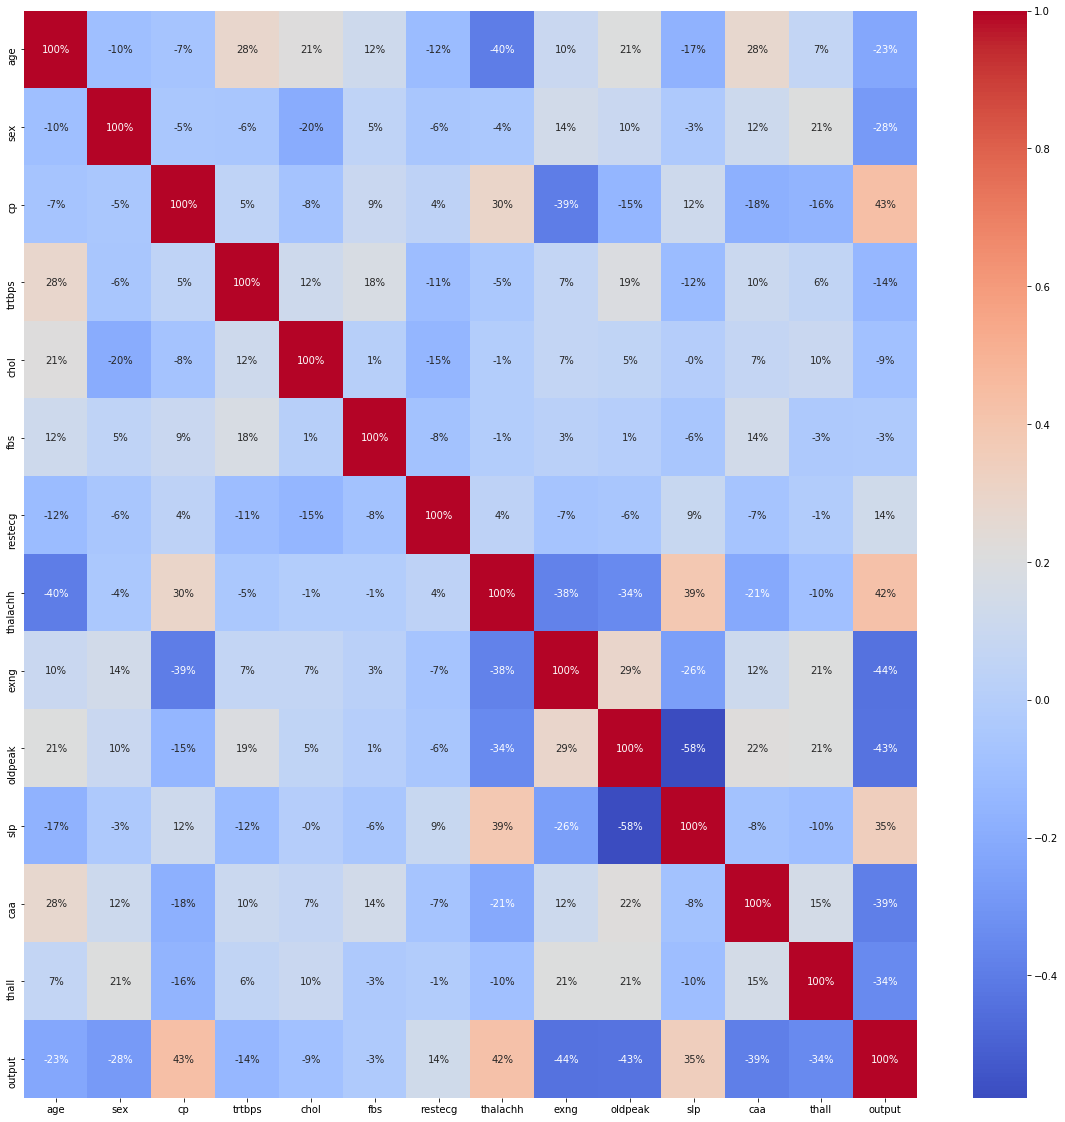

In [21]:
plt.figure(figsize=(20,20))  
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.0%')

The highest correlations are between:
- output and cp
- output and thalachh
- output and slp 
- slp and thallach 

## 2. Modeling 

In [22]:
data = pd.read_csv("heart.csv", sep=',')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 2.1. Transforming the data to reduce outliers 

In [23]:
#Using log transformation
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
columns_to_scale = ["trtbps", "chol", "thalachh", 'age']
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])
print("The first 5 rows of transformed data are")
data.head()

The first 5 rows of transformed data are


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.592593,1,3,0.75,-0.110236,1,0,-0.092308,0,2.3,0,0,1,1
1,-1.333333,1,2,0.00,0.157480,0,1,1.046154,0,3.5,0,0,2,1
2,-1.037037,0,1,0.00,-0.566929,0,0,0.584615,0,1.4,2,0,2,1
3,0.074074,1,1,-0.50,-0.062992,0,1,0.769231,0,0.8,2,0,2,1
4,0.148148,0,0,-0.50,1.795276,0,1,0.307692,1,0.6,2,0,2,1


### 2.2. One-Hot Encoding

In [24]:
print('output values:', data['output'].unique())
print('output cp:', data['cp'].unique())
print('output restecg:', data['restecg'].unique())
print('output exng:', data['exng'].unique())
print('output caa:', data['caa'].unique())
print('output slp:', data['slp'].unique())

output values: [1 0]
output cp: [3 2 1 0]
output restecg: [0 1 2]
output exng: [0 1]
output caa: [0 2 1 3 4]
output slp: [0 2 1]


In [25]:
Encoded = pd.get_dummies(data, columns = ['sex','exng','fbs','thall', 'cp', 'restecg', 'slp', 'caa'])
Encoded.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_0,sex_1,exng_0,exng_1,...,restecg_1,restecg_2,slp_0,slp_1,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4
0,0.592593,0.75,-0.110236,-0.092308,2.3,1,0,1,1,0,...,0,0,1,0,0,1,0,0,0,0
1,-1.333333,0.00,0.157480,1.046154,3.5,1,0,1,1,0,...,1,0,1,0,0,1,0,0,0,0
2,-1.037037,0.00,-0.566929,0.584615,1.4,1,1,0,1,0,...,0,0,0,0,1,1,0,0,0,0
3,0.074074,-0.50,-0.062992,0.769231,0.8,1,0,1,1,0,...,1,0,0,0,1,1,0,0,0,0
4,0.148148,-0.50,1.795276,0.307692,0.6,1,1,0,0,1,...,1,0,0,0,1,1,0,0,0,0


### 2.3. Splitting the data 

In [26]:
X = Encoded.drop('output', axis=1).copy()
y = Encoded['output'].copy()

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0, stratify = y)

### 2.4. Testing diffrent models with GridSearchCV and RandomizedSearchCV

In [28]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pipe_lr = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression(random_state=0)) 
pipe_svc = make_pipeline(StandardScaler(), SVC(random_state=0))
pipe_knn = make_pipeline(StandardScaler(), KNeighborsClassifier()) 

tree = DecisionTreeClassifier(random_state=0)
tree = tree.fit(X_train, y_train)

forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

ada = AdaBoostClassifier(random_state=0)
ada.fit(X_train, y_train)

param_C = np.arange(0.01, 1.0, 0.01)
param_gamma = np.arange(0.01, 1.0, 0.01)
param_pca = np.arange(2, 25)
param_knn = np.arange(2, 25)

param_grid_lr = [{'logisticregression__C': param_C,'pca__n_components': param_pca}]

param_grid_svc = [{'svc__C': param_C, 
               'svc__kernel': ['linear']},
              {'svc__C': param_gamma, 
               'svc__gamma': param_C, 
               'svc__kernel': ['rbf']}]

param_grid_knn = [{'kneighborsclassifier__n_neighbors': param_knn}]


path = tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

random_grid_tree = {'ccp_alpha': ccp_alphas,
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.arange(1, 30)]}

random_grid_forest = {'n_estimators': [x for x in np.arange(10, 300, 5)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.arange(1, 20)],
               'min_samples_split': np.arange(1, 20),
               'min_samples_leaf': np.arange(1, 5),
               'bootstrap': [True, False]}

random_grid_ada = {'n_estimators': [x for x in np.arange(10, 400, 5)],
                  'learning_rate': np.arange(0.1, 4.1, 0.1)}

classifiers_1 = [pipe_lr, pipe_svc, pipe_knn]
parameters_1 = [param_grid_lr, param_grid_svc, param_grid_knn]
names_1 = ['Logistic Regression', 'SVC', 'KNN']

classifiers_2 = [tree, forest, ada]
parameters_2 = [random_grid_tree, random_grid_forest, random_grid_ada]
names_2 = ['Decision Tree', 'Random Forest', 'AdaBoost']

for clf, param, name in zip(classifiers_1, parameters_1, names_1):
    clf.fit(X_train, y_train)
    gs = GridSearchCV(estimator=clf, 
                      param_grid=param, 
                      scoring='accuracy', 
                      cv=5,
                      n_jobs=-1)
    
    
    gs = gs.fit(X_train, y_train)
    print(name)
    print(round(gs.best_score_, 2))
    print(gs.best_params_)
    y_pred = gs.predict(X_test)
    print("The test accuracy score of {} after hyper-parameter tuning is ".format(name), round(accuracy_score(y_test, y_pred),2))
    print("")

for clf, param, name in zip(classifiers_2, parameters_2, names_2):
    rs = RandomizedSearchCV(estimator=clf, 
                                   param_distributions=param, 
                                   n_iter=100, cv=5, verbose=2, 
                                   random_state=0, n_jobs=-1)

    # # Fit the random search model
    print(name)
    rs.fit(X_train, y_train)
    print(rs.best_params_)
    print('accuracy:', round(rs.best_score_, 2))
    y_pred = rs.predict(X_test)
    print("The test accuracy score of {} after hyper-parameter tuning is".format(name), round(accuracy_score(y_test, y_pred),2))
    print("")

    

Logistic Regression
0.84
{'logisticregression__C': 0.060000000000000005, 'pca__n_components': 20}
The test accuracy score of Logistic Regression after hyper-parameter tuning is  0.87

SVC
0.84
{'svc__C': 0.7100000000000001, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
The test accuracy score of SVC after hyper-parameter tuning is  0.89

KNN
0.86
{'kneighborsclassifier__n_neighbors': 22}
The test accuracy score of KNN after hyper-parameter tuning is  0.85

Decision Tree
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


{'max_features': 'sqrt', 'max_depth': 4, 'ccp_alpha': 0.006611570247933882}
accuracy: 0.79
The test accuracy score of Decision Tree after hyper-parameter tuning is 0.89

Random Forest
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   20.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


{'n_estimators': 125, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 13, 'bootstrap': True}
accuracy: 0.86
The test accuracy score of Random Forest after hyper-parameter tuning is 0.84

AdaBoost
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   22.9s


{'n_estimators': 60, 'learning_rate': 0.1}
accuracy: 0.82
The test accuracy score of AdaBoost after hyper-parameter tuning is 0.84



[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   32.7s finished


### 2.5. Making new models with the best hiperparameters 

In [29]:
from sklearn.pipeline import make_pipeline
pipe_lr = make_pipeline(StandardScaler(), PCA(n_components=20), LogisticRegression(C=0.06, random_state=0))
pipe_svc = make_pipeline(StandardScaler(), SVC(C=0.71, gamma=0.01, kernel='rbf', random_state=0, probability=True))
pipe_knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=22))

pipe_tree = make_pipeline(StandardScaler(), DecisionTreeClassifier(ccp_alpha=0.00661157, random_state=0, max_features = 'sqrt',
                                                                     max_depth=4, criterion = 'gini'))

pipe_forest = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=125, random_state=0,
                                                                      min_samples_leaf=3, max_features = 'auto',
                                                                     max_depth=13, bootstrap=True,
                                                                    min_samples_split=9))

pipe_ada = make_pipeline(StandardScaler(), AdaBoostClassifier(n_estimators=60, random_state=0, learning_rate = 0.1))
classifiers = [pipe_lr, pipe_svc, pipe_knn, pipe_tree, pipe_forest, pipe_ada]
names = names_1
names += names_2

# 3. Final analysis 

### 3.1. Checking the accuracy of models on K-fold validation

In [30]:
from sklearn.model_selection import cross_val_score
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5, n_jobs=-1)
    print(name)
    print('Dokładność sprawdzianu: %.3f +/- %.3f' % ((np.mean(scores)), np.std(scores)))

Logistic Regression
Dokładność sprawdzianu: 0.843 +/- 0.026
SVC
Dokładność sprawdzianu: 0.843 +/- 0.034
KNN
Dokładność sprawdzianu: 0.855 +/- 0.046
Decision Tree
Dokładność sprawdzianu: 0.793 +/- 0.045
Random Forest
Dokładność sprawdzianu: 0.855 +/- 0.024
AdaBoost
Dokładność sprawdzianu: 0.822 +/- 0.038


### 3.2. ROC curves and AUC 

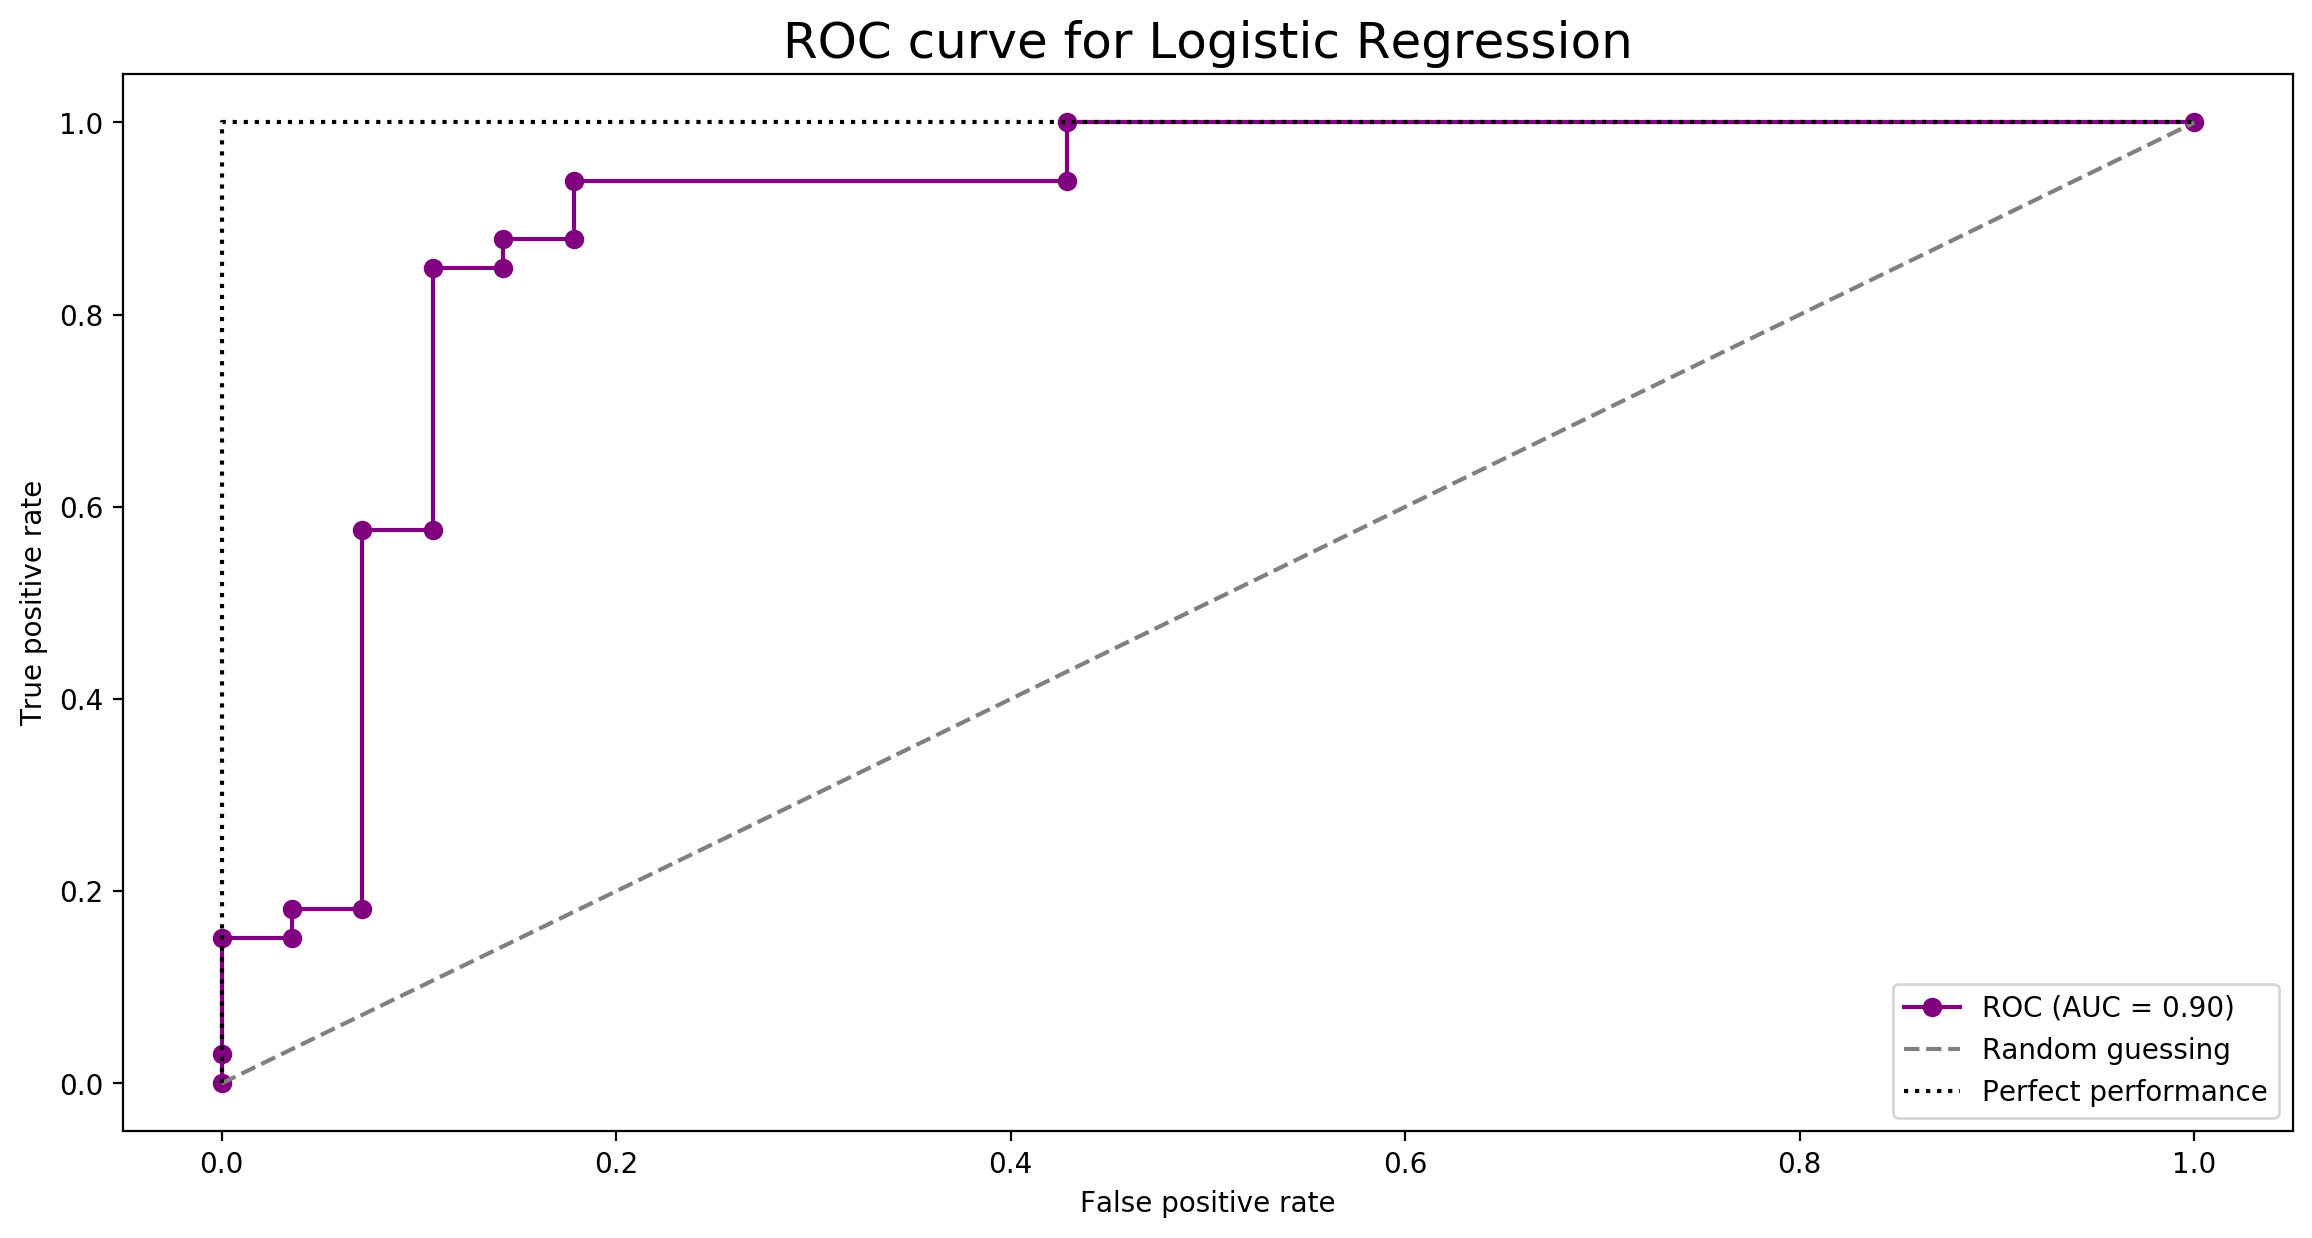

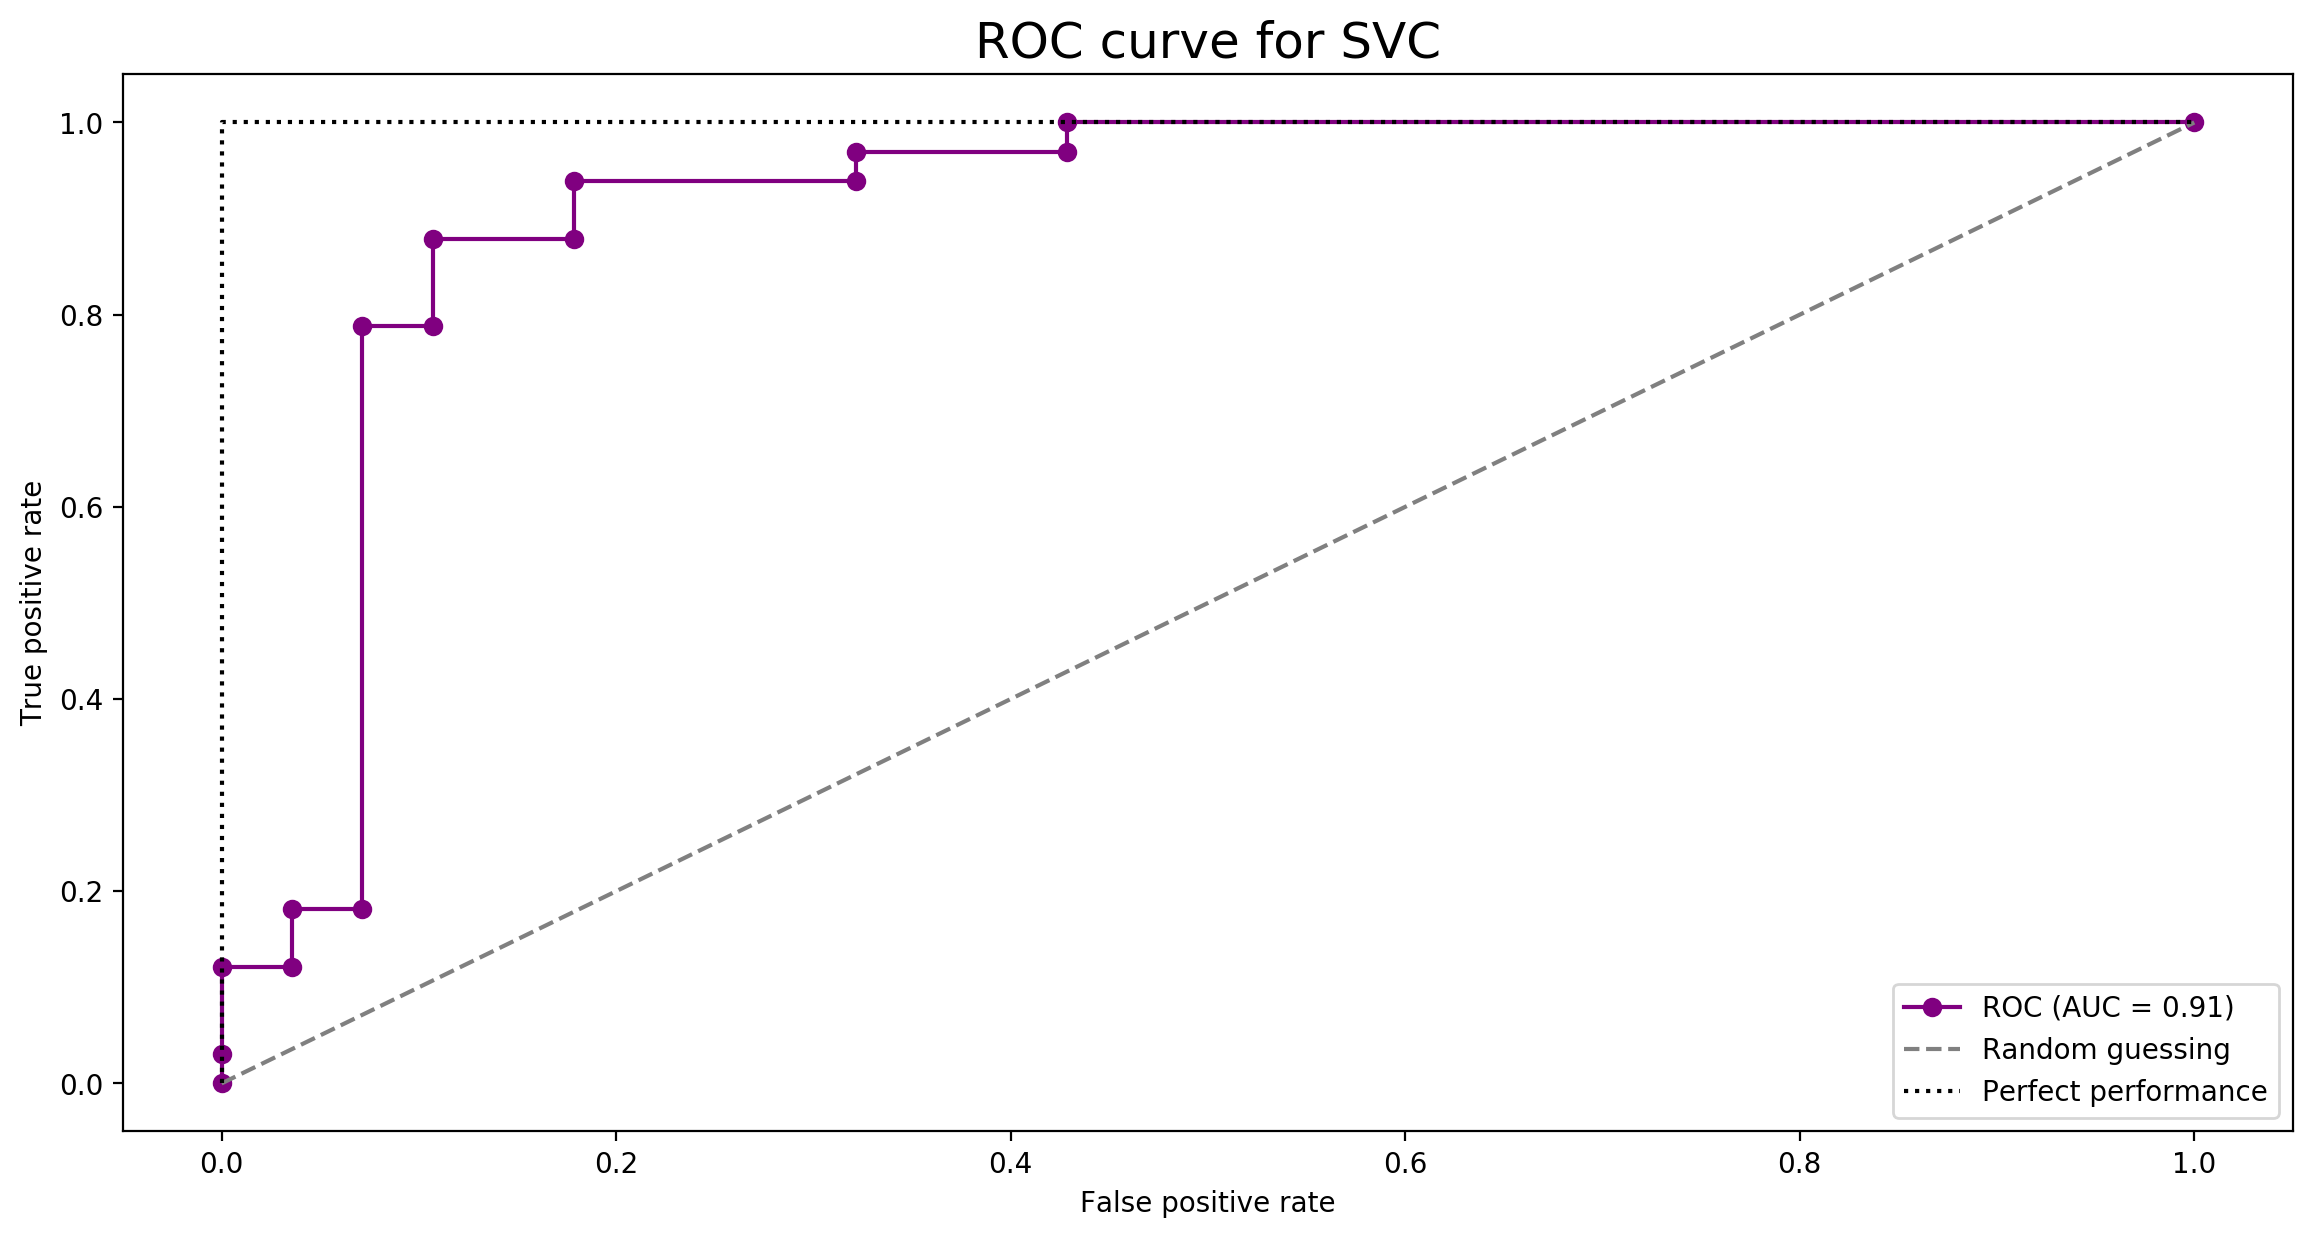

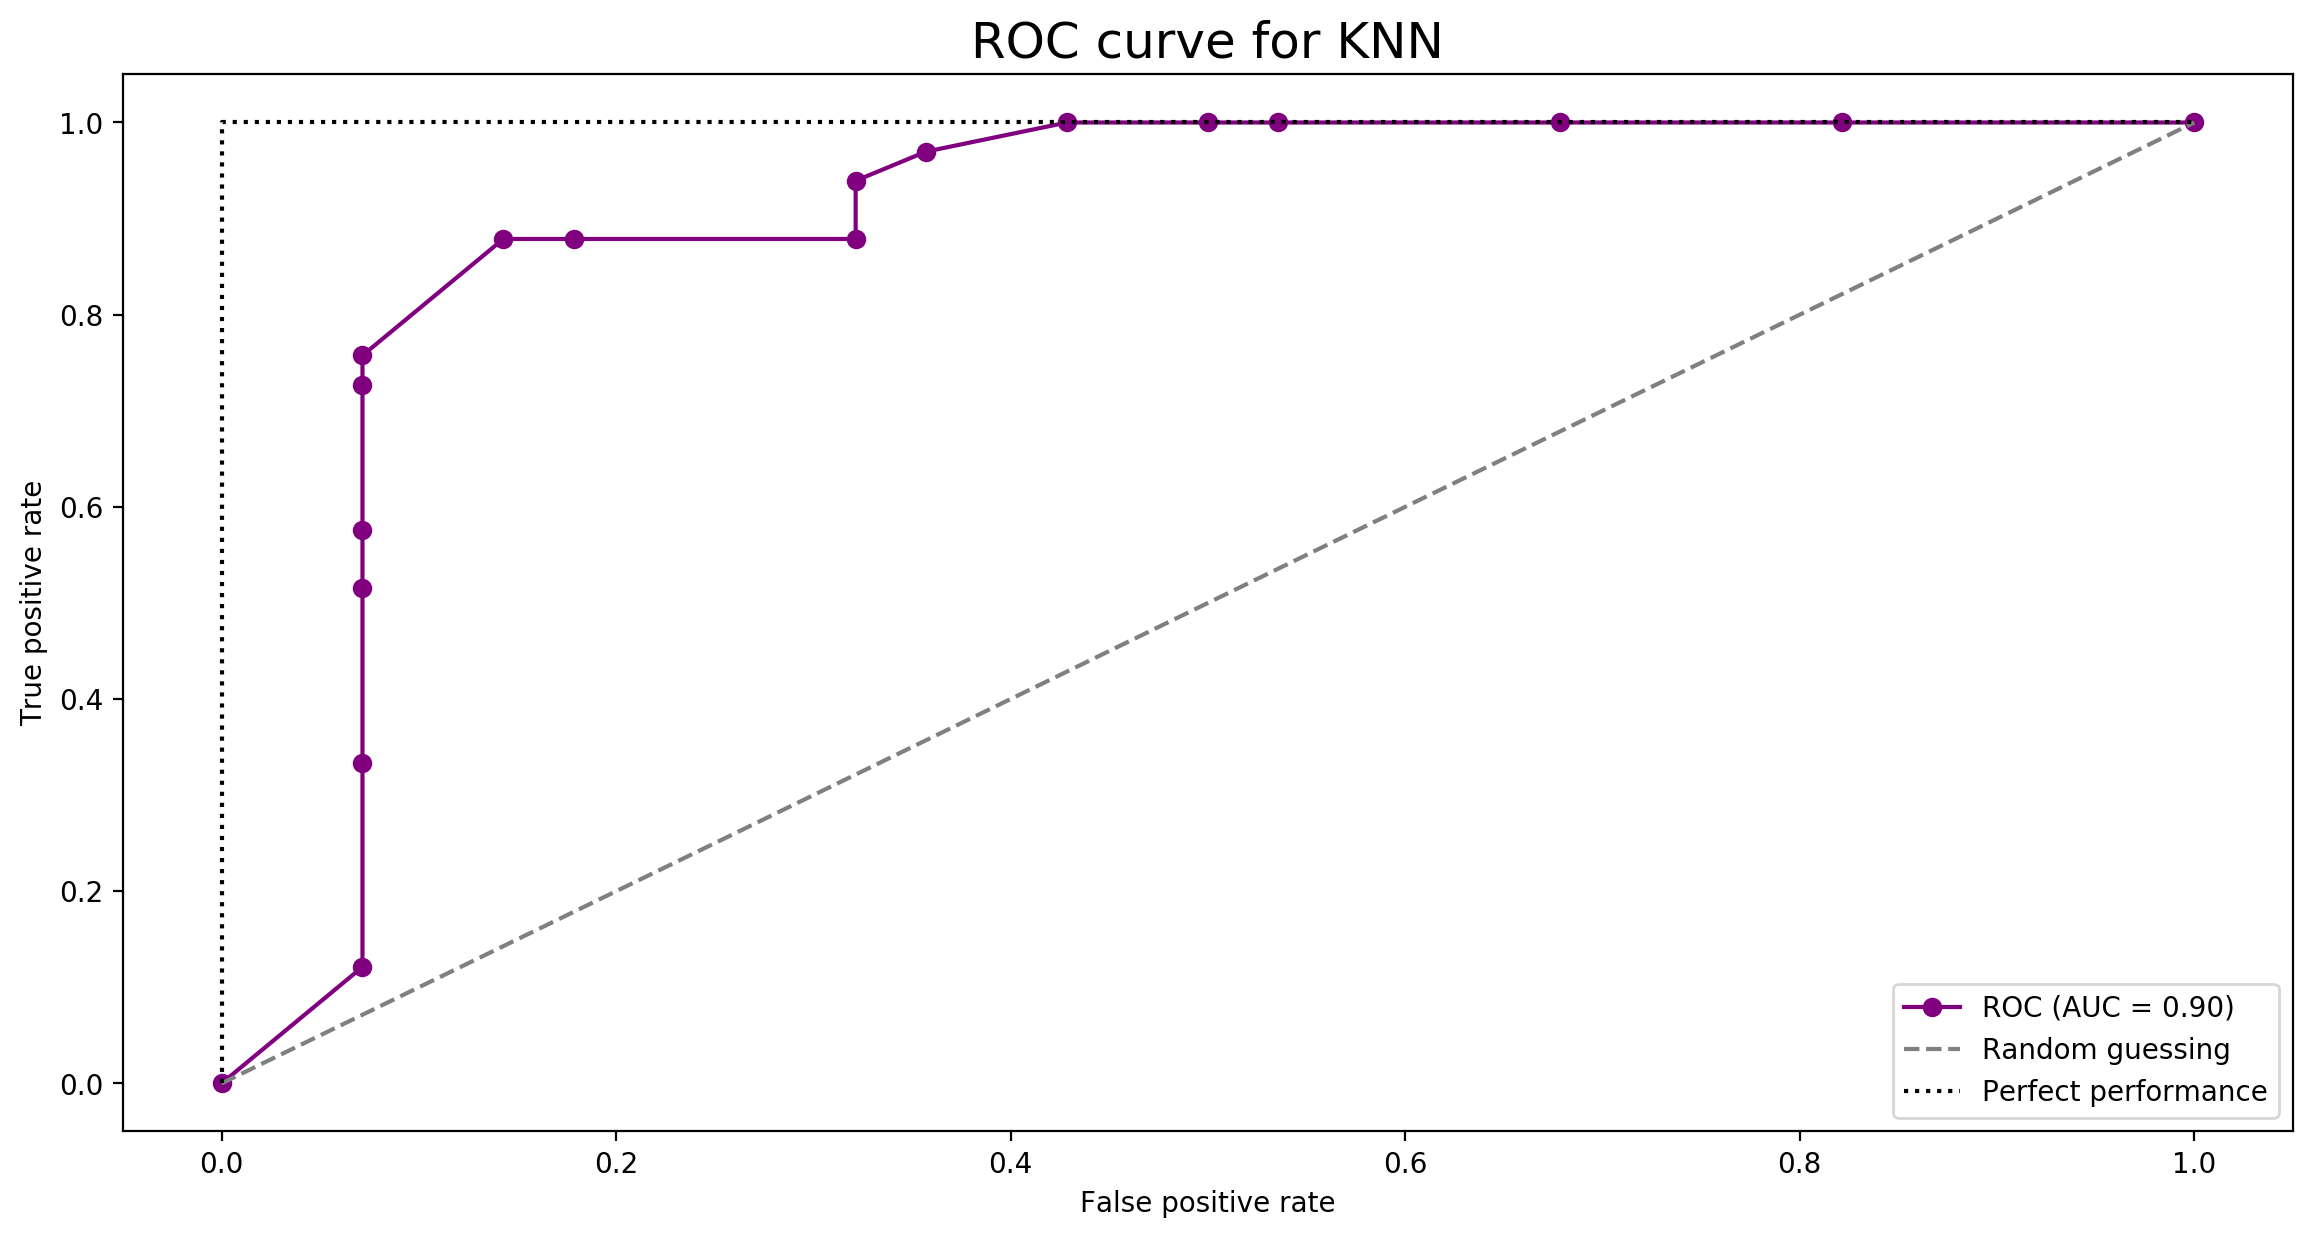

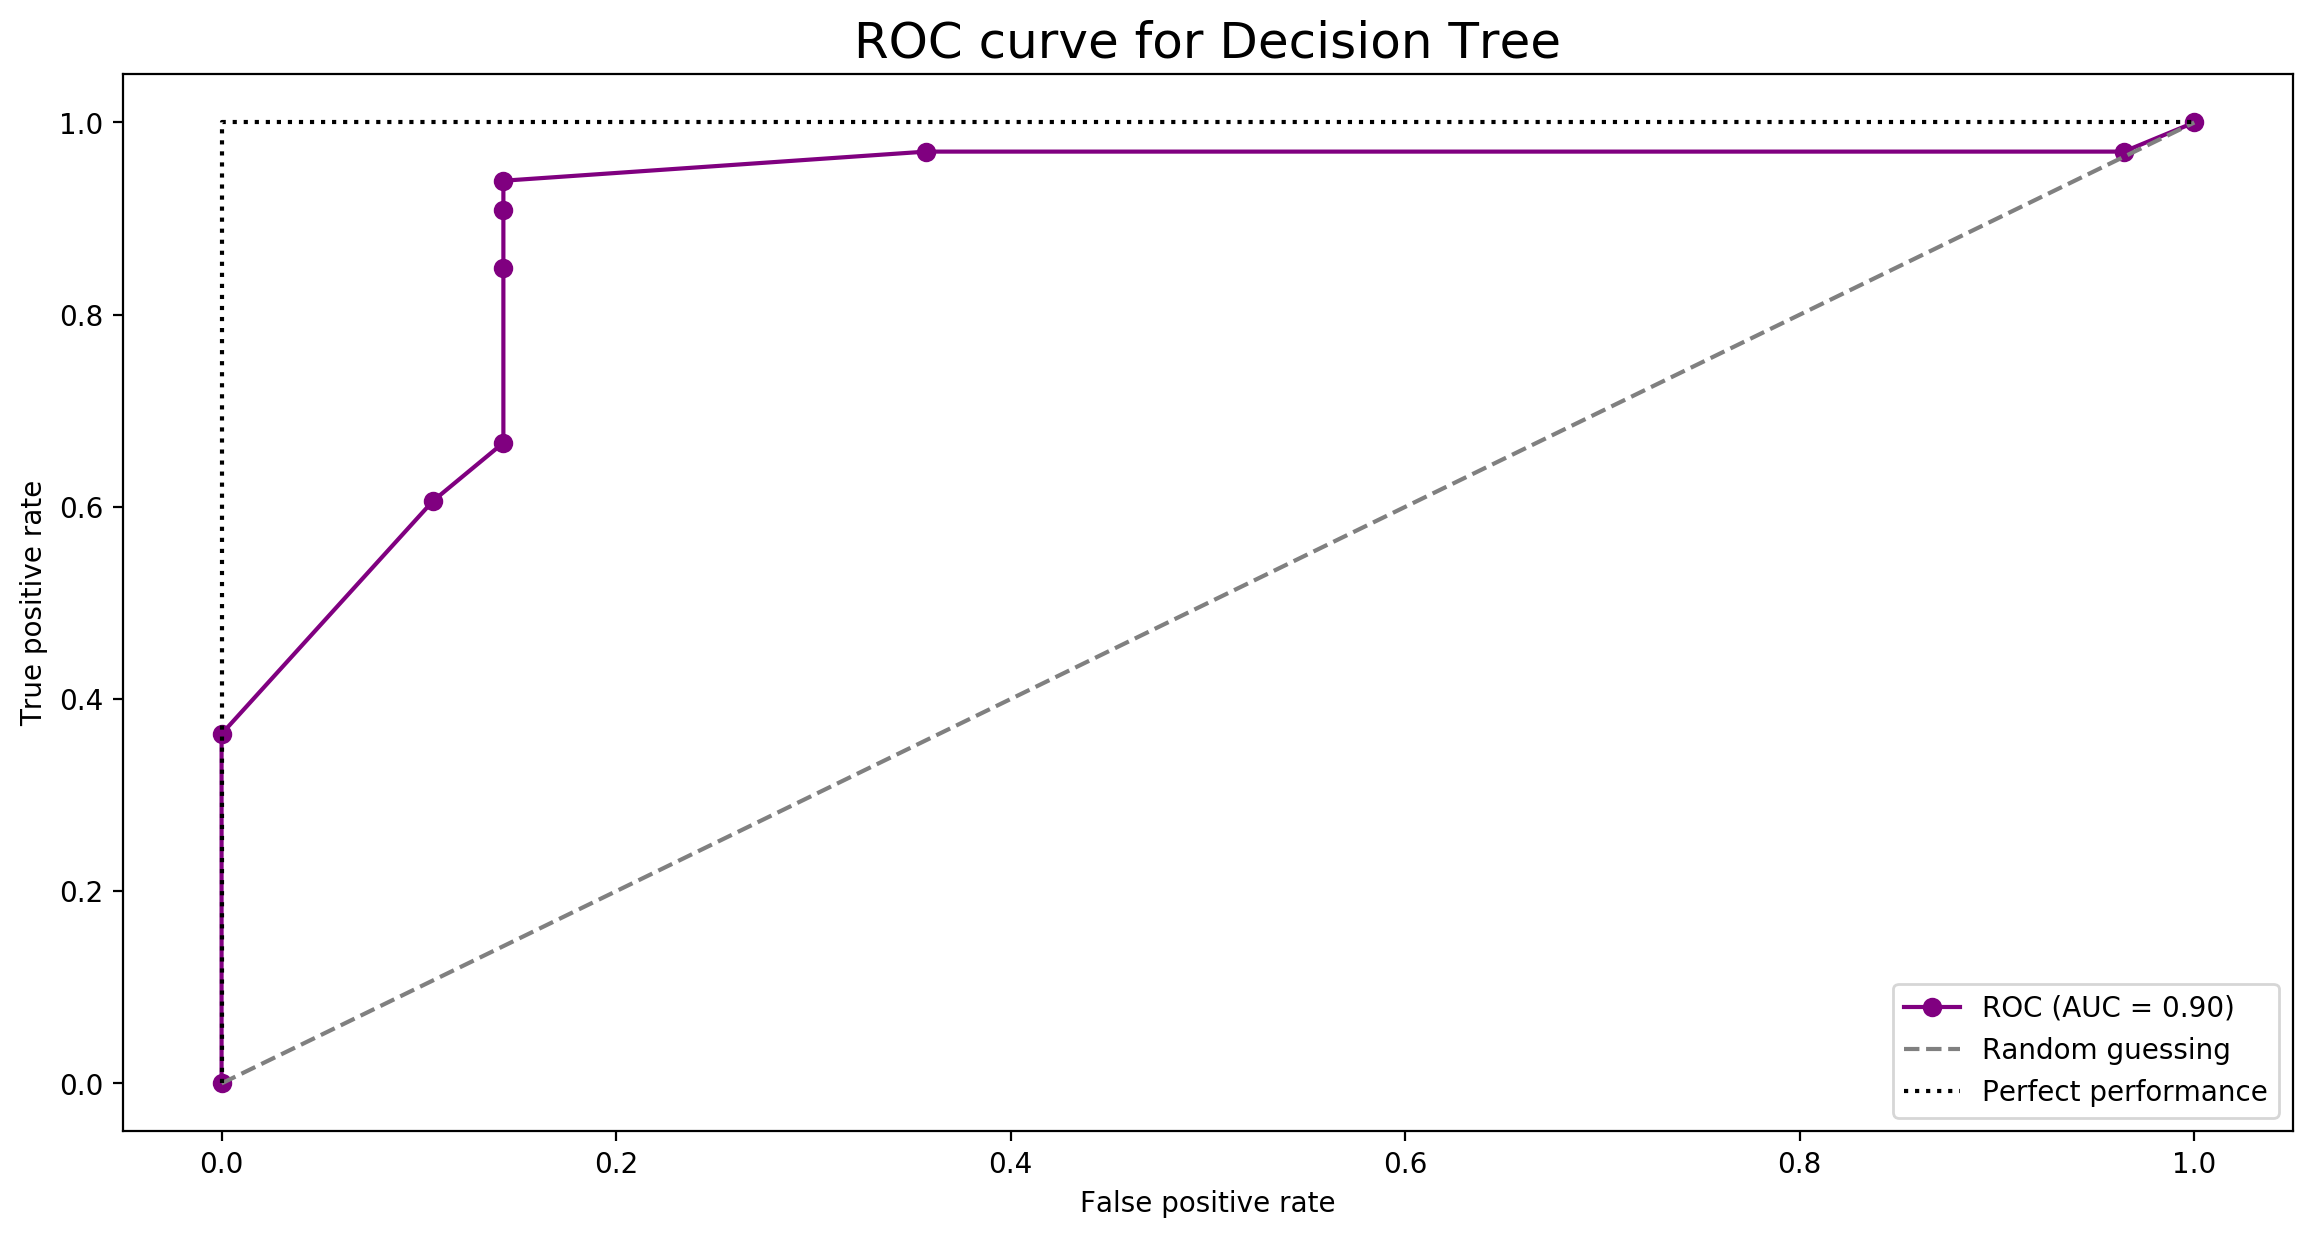

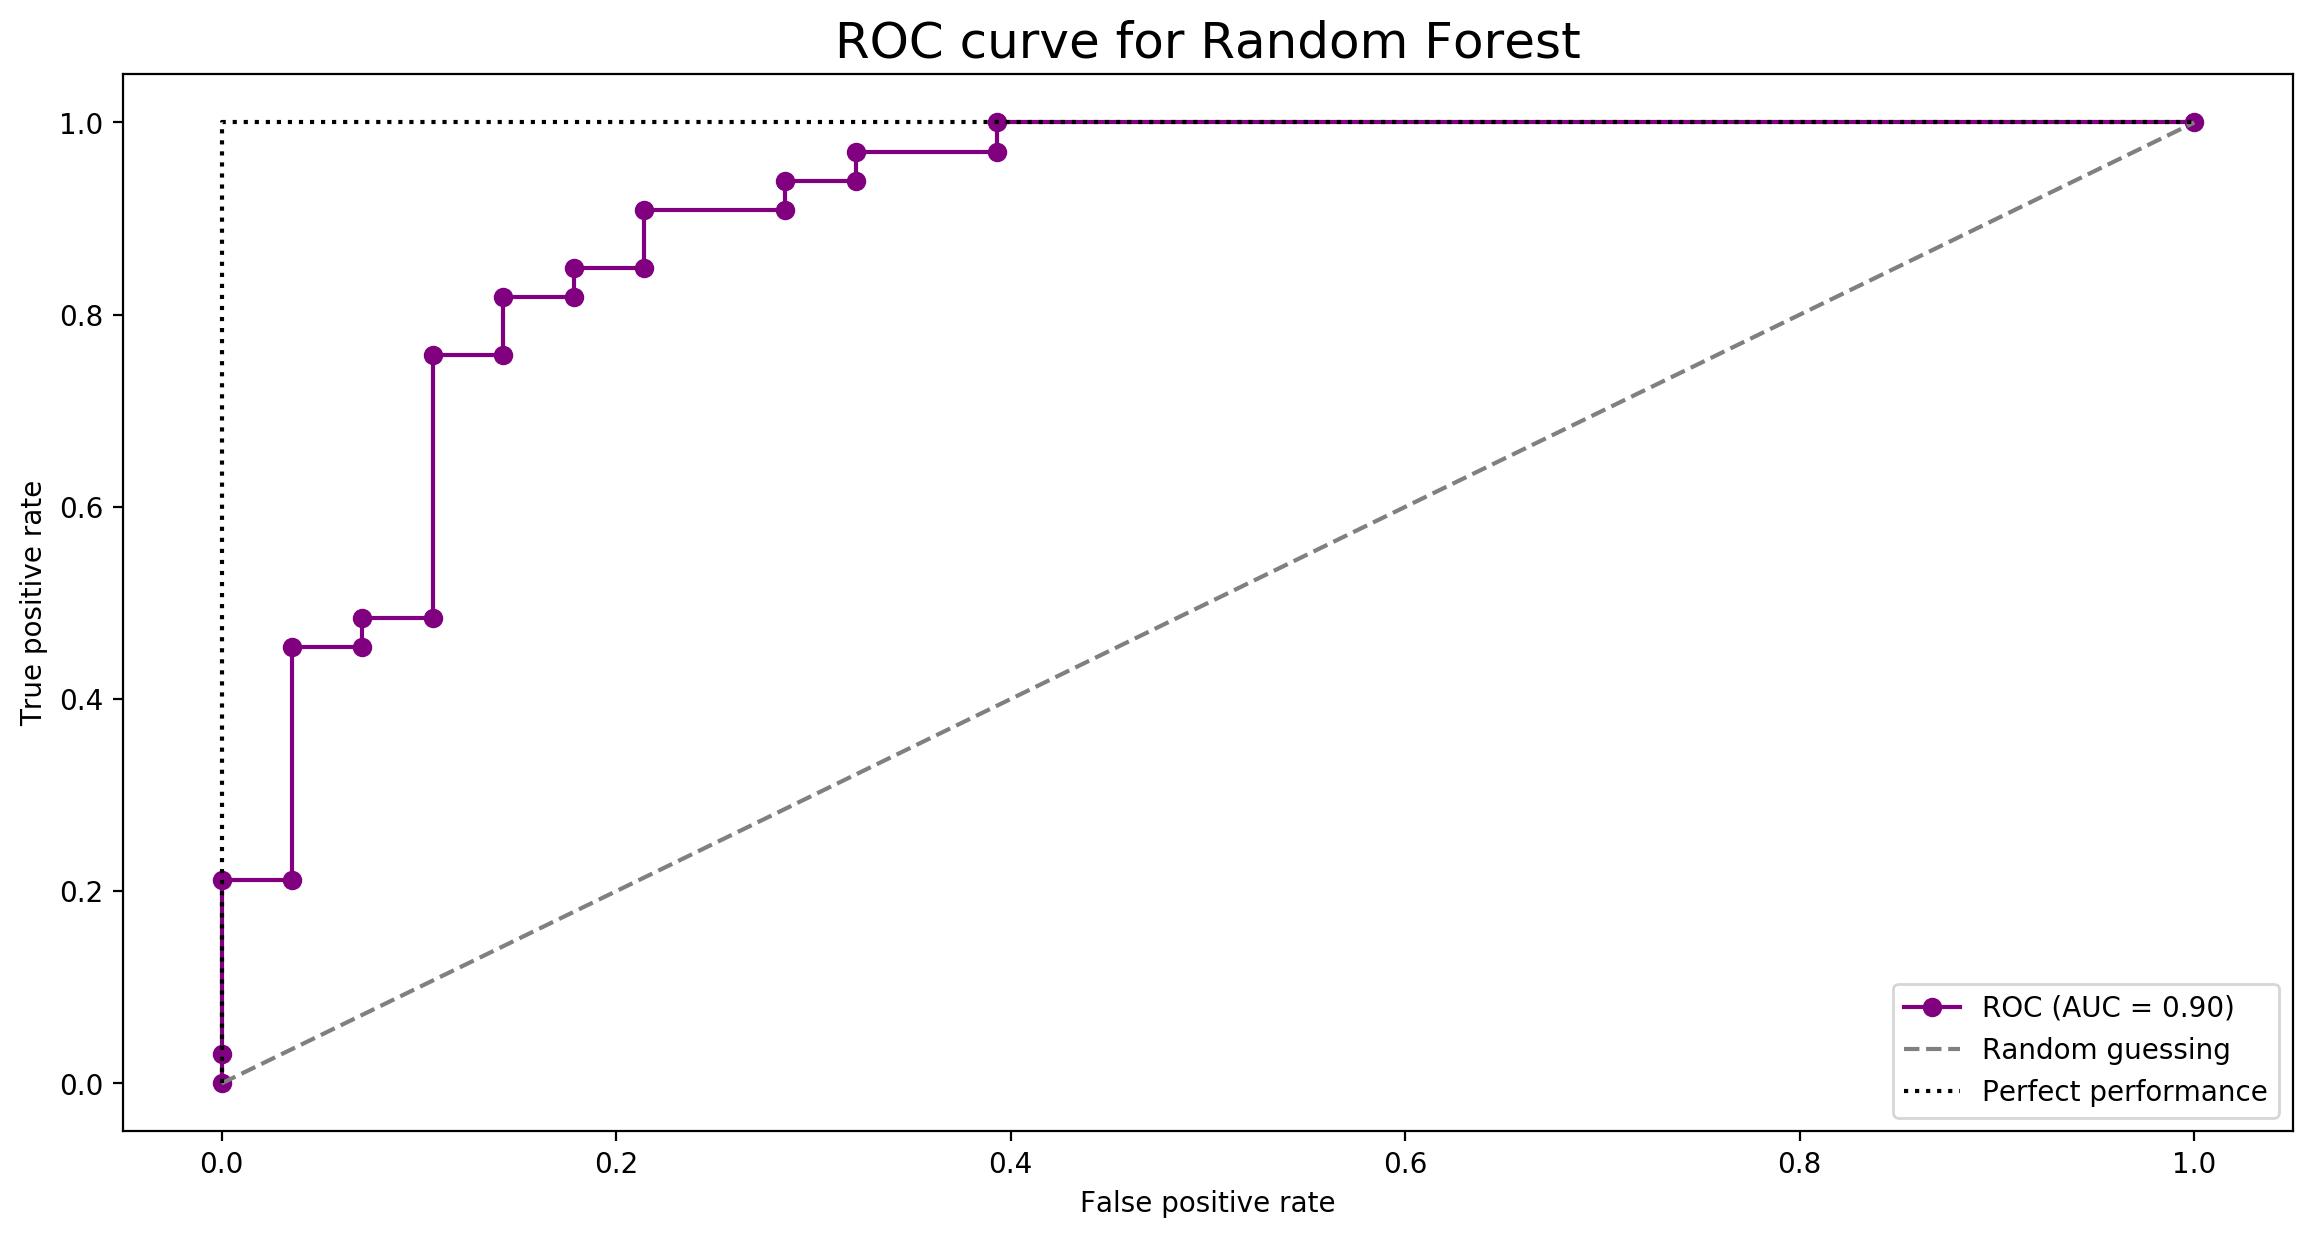

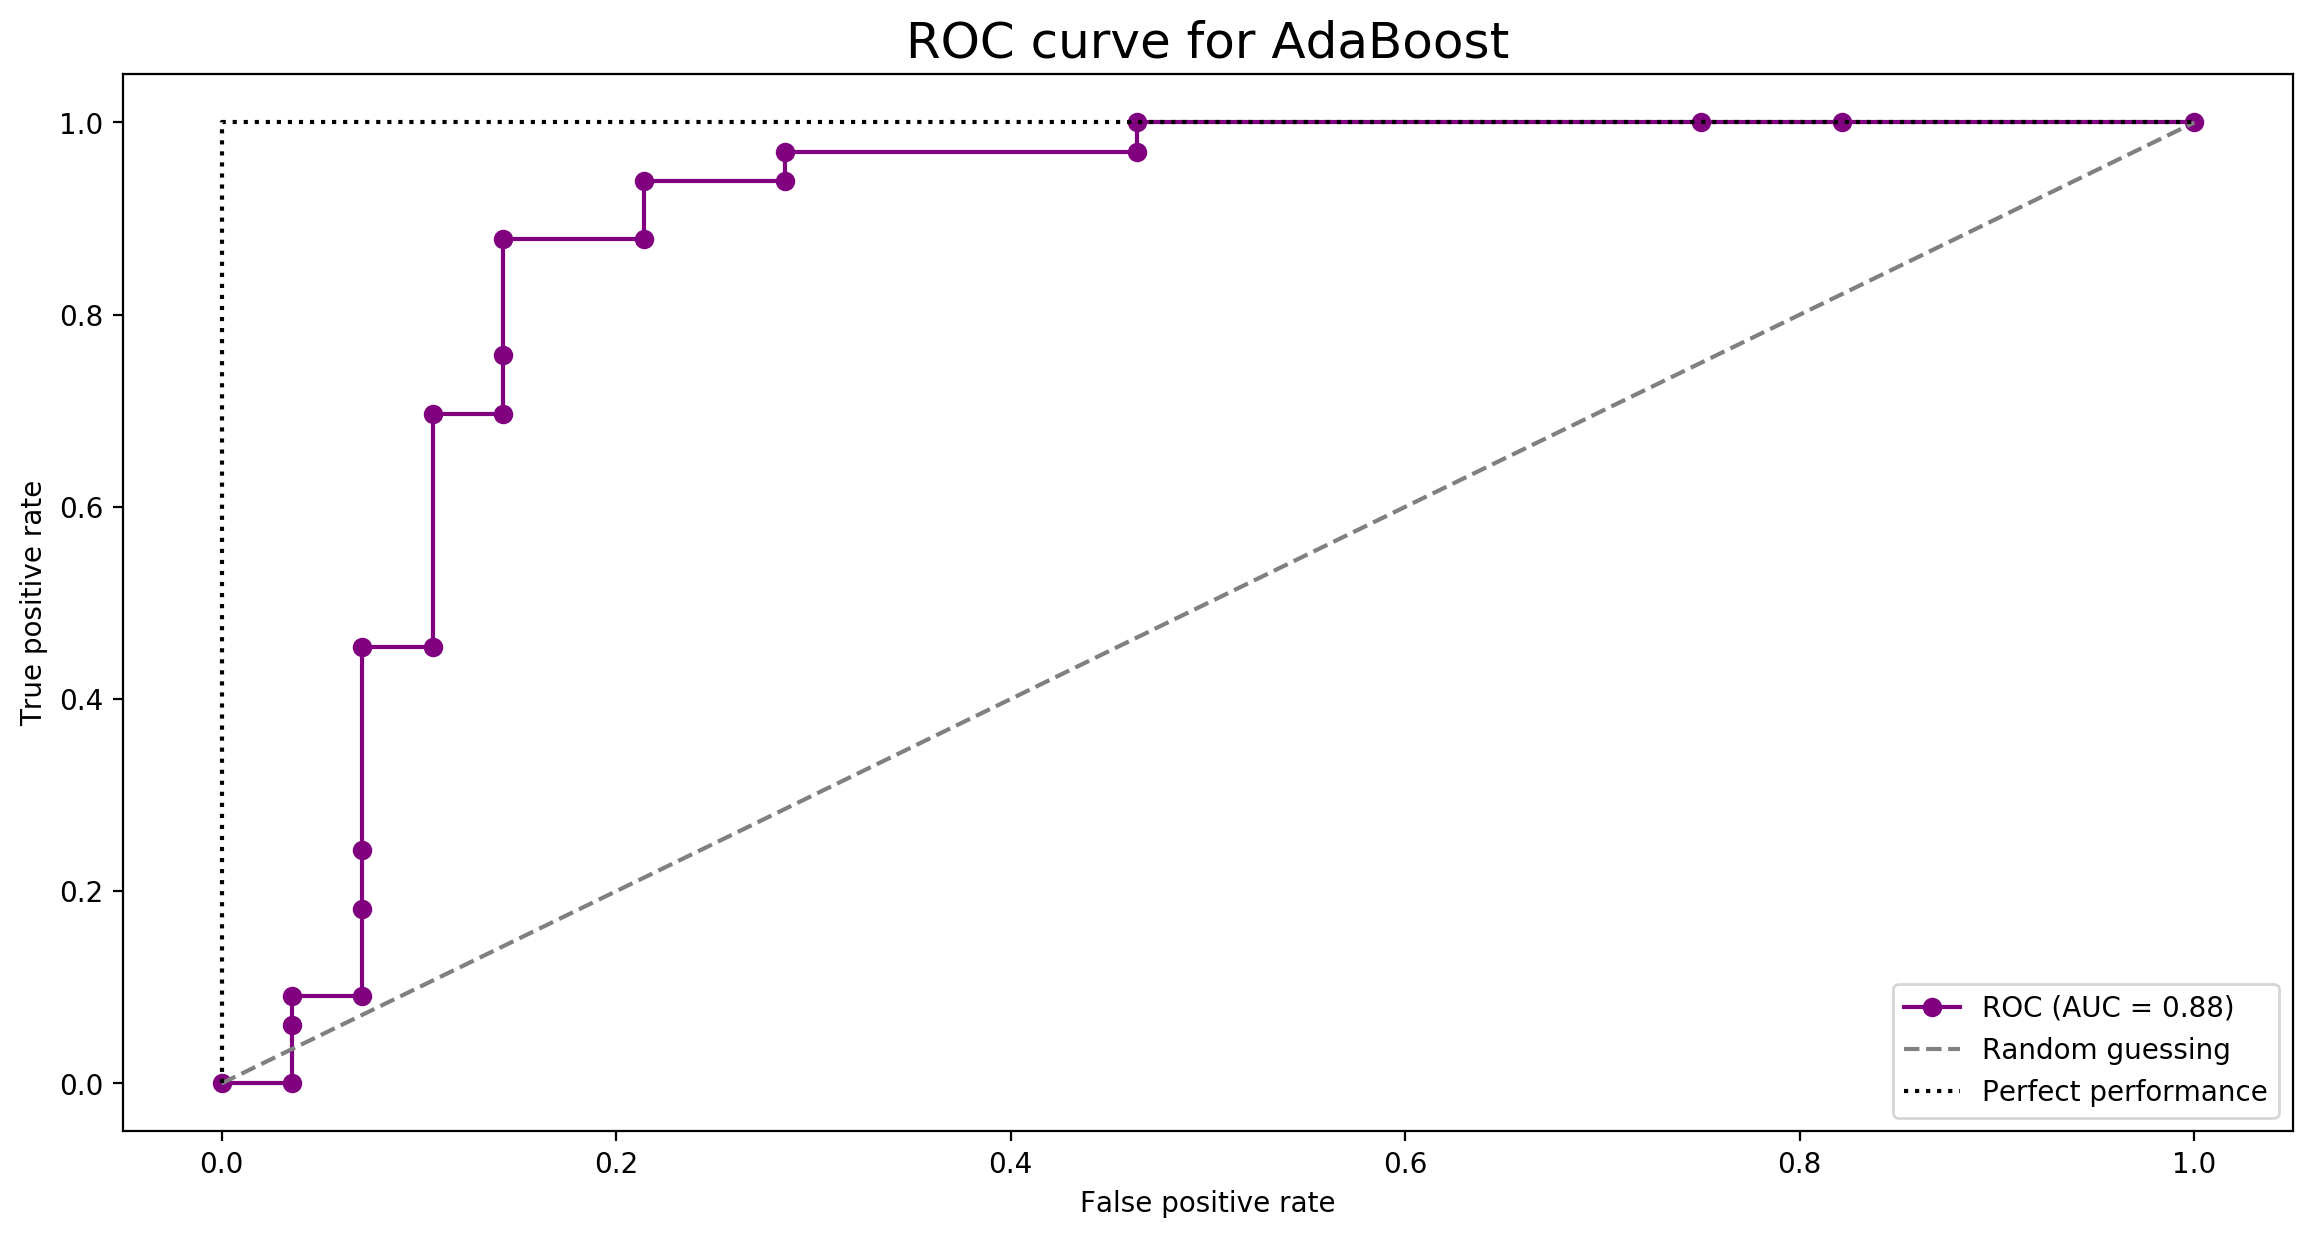

In [31]:
from sklearn.metrics import roc_curve, auc

for clf, name in zip(classifiers, names):
    probas = clf.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas[:,1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.figure(dpi=200, figsize=(14,7))
    plt.plot(fpr, tpr, color="purple", marker="o", label="ROC (AUC = %.2f)" % (roc_auc))
    plt.plot([0, 1], [0,1], linestyle="--", color="gray", label="Random guessing")
    plt.plot([0,0,1], [0,1,1], linestyle=":", color="black", label="Perfect performance")
    plt.legend(loc="best")
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.title("ROC curve for {}".format(name), fontsize=18)

### 3.3. Confusion matrices and test accuracy 

Test accuracy for Logistic Regression: 0.87

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        28
           1       0.84      0.94      0.89        33

    accuracy                           0.87        61
   macro avg       0.88      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61



<Figure size 720x720 with 0 Axes>

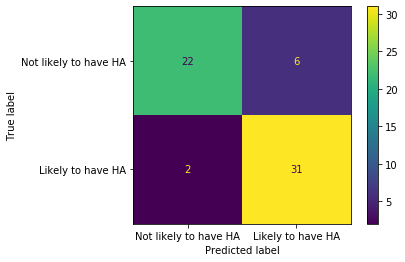

Test accuracy for SVC: 0.89

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        28
           1       0.86      0.94      0.90        33

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



<Figure size 720x720 with 0 Axes>

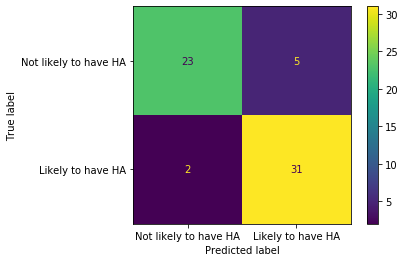

Test accuracy for KNN: 0.85

              precision    recall  f1-score   support

           0       0.85      0.82      0.84        28
           1       0.85      0.88      0.87        33

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



<Figure size 720x720 with 0 Axes>

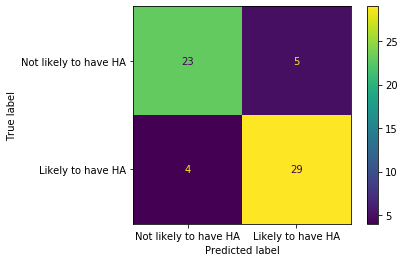

Test accuracy for Decision Tree: 0.89

              precision    recall  f1-score   support

           0       0.89      0.86      0.87        28
           1       0.88      0.91      0.90        33

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



<Figure size 720x720 with 0 Axes>

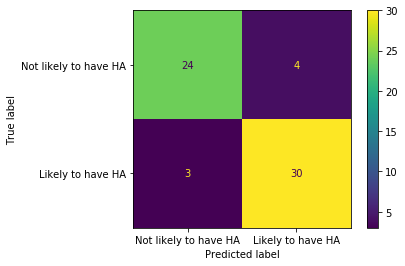

Test accuracy for Random Forest: 0.84

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        28
           1       0.85      0.85      0.85        33

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



<Figure size 720x720 with 0 Axes>

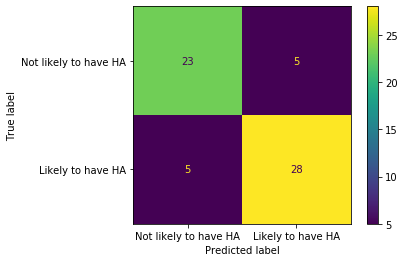

Test accuracy for AdaBoost: 0.84

              precision    recall  f1-score   support

           0       0.85      0.79      0.81        28
           1       0.83      0.88      0.85        33

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



<Figure size 720x720 with 0 Axes>

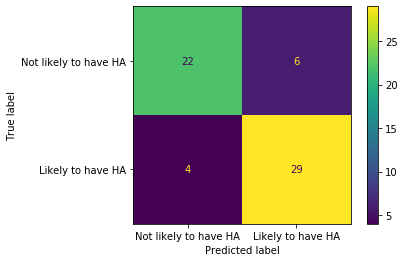

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

for clf, name in zip(classifiers, names):
    plt.figure(figsize=(10,10))
    plot_confusion_matrix(clf, X_test, y_test, display_labels=['Not likely to have HA','Likely to have HA'])
    print('Test accuracy for {}:'.format(name), round(accuracy_score(y_test, clf.predict(X_test)), 2))
    print("")
    print(classification_report(y_test, clf.predict(X_test)))
    plt.show()